<a href="https://colab.research.google.com/github/MamadouBousso/Pytorch_courses/blob/main/CNN2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
CONVOLUTION PARTIE 1
---
La convolution est une operation mathématique entre deux fonctions $$ f $$ et $$g$$ qui produit une troisieme fonction $$f*g$$ quiùontre comment la forme de l'une est modifiée par  l'autre.

En traitement d'images une matrice de convolution est aussi appelée en utilisant les filtres ou les noyaux.

Beaucoup de transformations sur les images sont fait à partir d'operations de convolution avec des filtres.

**Importation des bibliotheques**

In [ ]:
import random
import numpy as np
from PIL import Image
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, Normalize
###from data_generation.image_classification import generate_dataset
###from helpers import index_splitter, make_balanced_sampler

**Convolution d'images**

* Prendre un volume en entree
* Appliquer un filtre à chaque position de l'entrée
* Produire un autre volume



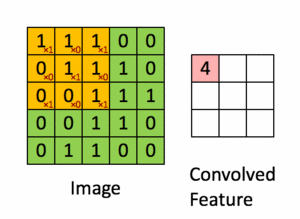

** Exercice 1 **


In [ ]:
mat = np.array(
  [[[[5, 0, 8, 7, 8, 1],
  [1, 9, 5, 0, 7, 7],
  [6, 0, 2, 4, 6, 6],
  [9, 7, 6, 6, 8, 4],
  [8, 3, 8, 5, 1, 3],
  [7, 2, 7, 0, 1, 0]]]]
)


In [ ]:
mat.shape

(1, 1, 6, 6)

In [ ]:
I = np.array(
  [[[[0, 0, 0],
  [0, 1, 0],
  [0, 0, 0]]]]
)
type(I.shape)

tuple

In [ ]:
I.shape

(1, 1, 3, 3)

**Filtre**

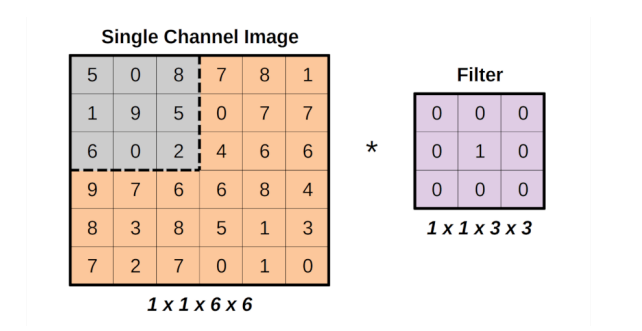

* La region en grise est appelée receptive field. Elle a les memes dimensions que le filtre. 
* Notre exemple a comme modele de dimension le NCHW de pytorch. C'est à dire N represente le nombre d'images, C le nombre de canaux par image, H la hauteur d'une image et W la largeur d'une image/
* Dans notre exemple nous avons une seule image, un seul canal, la longueur et la largeur de l'image est de 6 pixels.
* Nous allons prendre la premiére region et faire une multiplication element par element avec le noyau comme dans l'image ci-dessous.
* Nous faisons la somme des elements de la matrice obtenue à l'issue du produit et mettons la valeur obtenue dans la nouvelle matrice

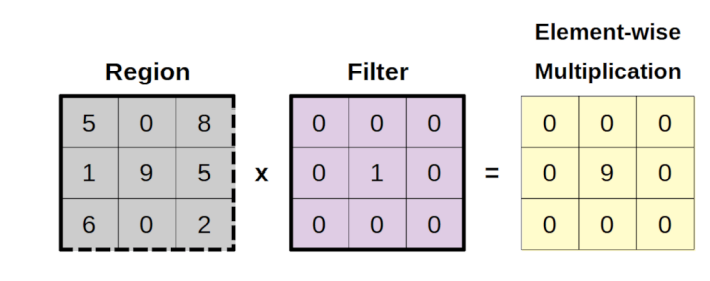

In [ ]:
region1 = mat[:,:,0:3,0:3]*I

In [ ]:
region1

array([[[[0, 0, 0],
         [0, 9, 0],
         [0, 0, 0]]]])

* On deplace la region d'une dimension vers la droite comme dans l'image. Dependant du probleme à resoudre nous pouvons faire le choix de deux ou trois dimensions pour le deplacement.
Cette dimension est appelée *stride*

* Quelle que soit la dimension du stride, l'operation reste la meme

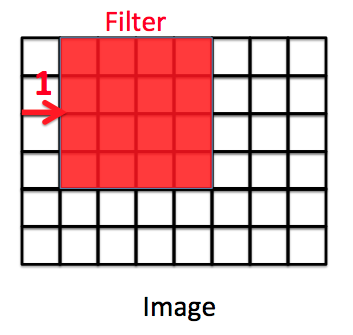

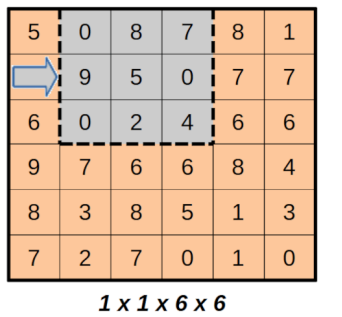

In [ ]:
region2 = mat[:,:,0:3,1:4]*I

In [ ]:
region2

array([[[[0, 0, 0],
         [0, 5, 0],
         [0, 0, 0]]]])

**Attention: Nous pouvons continuer à deplacer le receptive field mais à la longue les dimensions entre le receptive field et le noyau ne correspondent plus**

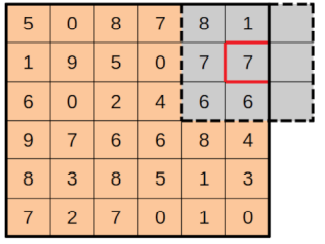

In [ ]:
region3 = mat[:,:,0:3,4:7]*I

ValueError: ignored

**Question 1: Completer la fonction convolution ci-dessous qui permet de faire tout le processus de calcul et retourne la matrice finale?**

In [ ]:

def convolution(image,noyau):
  # Redimensionnement des images: de NHCW en HW
  #image = np.squeeze(image,axis = (0,1))
  #noyau = np.squeeze(noyau,axis = (0,1))
  # Recuperation des dimensions
  M,N = image.shape[2:]
  K,L  = noyau.shape[2:]
  # Image filtrée 
  out = np.zeros((1,1,M-K+1,N-L+1))

  for i in range(M-K+1):
    for j in range(N-L+1):
      # Filtrage par region
      out[:,:,i,j]= np.sum(np.multiply(image[:,:,i:i+K,j:j+L],noyau))
      
  return out


**Question2: quelles sont les dimensions de la nouvelle image?**
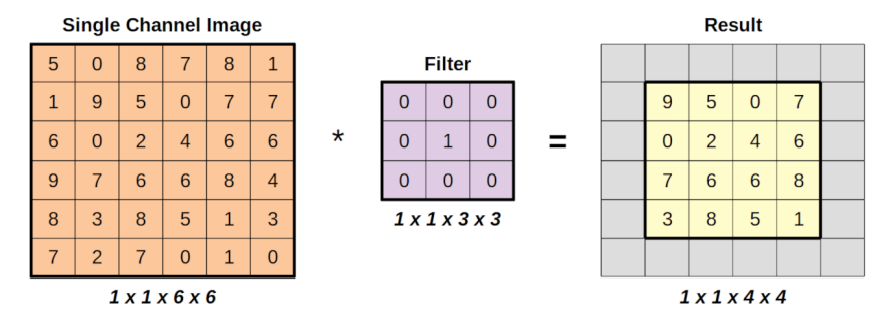

In [ ]:
out = convolution(mat,I)

In [ ]:
print(out.shape)

(1, 1, 4, 4)


**Taille de la nouvelle image**

A chaque fois qu'un filtre est appliqué dans une region, cette derniere passe de dimension du filtre à dimension 1, donc la region est reduite de **(dimension du filtre -1)**.

**Plus la taille du filtre est grande, plus la taille de l'image de sortie devient petite.**



  $$ (h_{i},w_{i}) * (h_{f},w_{f})= (h_{i} - h_{f}+1,w_{i} - w_{f}+1)$$



**Questions**

* Comment peut-on conserver les dimensions de l'image originale aprés convolution?
* Quelle sera la taille de la nouvelle image si le stride est different de 1?

**Convoution sous pytorch**

On transforme les matrices numpy en tenseurs pytorch

In [ ]:
mat_tens = torch.as_tensor(mat,dtype=torch.float32)
I_tens = torch.as_tensor(I,dtype=torch.float32)

Sous pytorch les convolutions sont définies sous forme de fonction et de module:

* Les fonctions de convolution prennent un filtre en argument
* Les modules prennent des poids representant le filtre en arguments et permettent de definir des couches

In [ ]:
conv_mat = torch.conv2d(mat_tens,I_tens,stride=1)

In [ ]:
conv_mat

tensor([[[[9., 5., 0., 7.],
          [0., 2., 4., 6.],
          [7., 6., 6., 8.],
          [3., 8., 5., 1.]]]])

Par contre le module de convolution **torch.nn.Conv2d** prend en arguments:

* in_channel: le nombre de canaux de l'image à filtrer
* out_channel: le nombre de canaux en sortie
* kernel_size: la taille de la matrice du noyau
* stride: la valeur du stride

Vous pouvez noter qu'il qu'il n'y a aucune valeur du filtre dans les paramétres et qu'il n'y a que la taille du filtre. En fait le module va apprendre à generer les données du filtre.



In [ ]:
conv = nn.Conv2d(in_channels = 1,out_channels = 1, kernel_size = 3, stride = 1)

In [ ]:
conv

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

In [ ]:
conv(mat_tens)

tensor([[[[ 0.6522, -2.0550,  0.8605, -1.3968],
          [-0.1080, -0.1979, -0.3733, -1.1429],
          [-1.0463, -2.4913,  0.5281, -0.4442],
          [ 1.2378, -1.6787,  0.7564,  0.4822]]]],
       grad_fn=<ConvolutionBackward0>)

**Cette matrice n'est qu'une version initiale du filtre. Le module a initialisé aleatoirement les poids du filtre. Elle va evoluer au cours de l'apprentissage**

Il est possible de fournir des sorties sur de multiples canaux avec un filtre par canal avec out_channels.


In [ ]:
conv2 = nn.Conv2d(in_channels = 1,out_channels = 3, kernel_size = 3, stride = 1)

In [ ]:
conv2

Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))

In [ ]:
conv2(mat_tens)

tensor([[[[ 2.3858,  4.3984,  5.0551,  5.3583],
          [ 4.7809,  5.0109,  4.8326,  4.4879],
          [ 3.2952,  3.6155,  1.8119,  3.3847],
          [ 4.2603,  5.3237,  3.4639,  2.7035]],

         [[-1.5619,  1.6529,  0.4590, -1.0992],
          [ 2.5405, -0.8616,  0.0347,  1.8586],
          [-0.9527,  1.5320,  0.8469, -0.3777],
          [-0.5272,  0.1216,  0.1691,  0.1929]],

         [[-0.6432, -2.8616, -3.4049, -3.9080],
          [-2.0231, -1.9112, -2.0442, -3.4354],
          [-2.0248, -3.7101, -2.3979, -2.1249],
          [-2.8337, -3.5753, -0.6753, -2.4010]]]],
       grad_fn=<ConvolutionBackward0>)

# Objectif reseau de neurones convolés

C'est tout l'intérêt du module convolutif : il va apprendre
le noyau/filtre tout seul.


Dans la vision par ordinateur traditionnelle, les gens développeraient différents
filtres à des fins différentes : flou, netteté, detection de contour
détection, etc.

L'obectif est qu'au lieu d'essayer de concevoir manuellement un filtre
qui convient pour un problème donné, on externalise la
définition du filtre au réseau de neurones. 

Le
réseau proposera des filtres qui mettent en évidence les fonctionnalités qui sont
pertinentes pour la tâche à accomplir.
Il n'est pas surprenant que l'image résultante ait un attribut **grad_fn** qui sera utilisé pour calculer les gradients afin que le réseau puisse
apprendre  comment changer les poids représentant le filtre

**On peut aussi forcer le reseau à utiliser un filtre**

In [ ]:
with torch.no_grad():
  conv.weight[0] = I_tens
  conv.bias[0] = 0




In [ ]:
conv(mat_tens)

tensor([[[[9., 5., 0., 7.],
          [0., 2., 4., 6.],
          [7., 6., 6., 8.],
          [3., 8., 5., 1.]]]], grad_fn=<ConvolutionBackward0>)

**Revenons sur le stride**


Supposons que nous augmentons le pas de 2

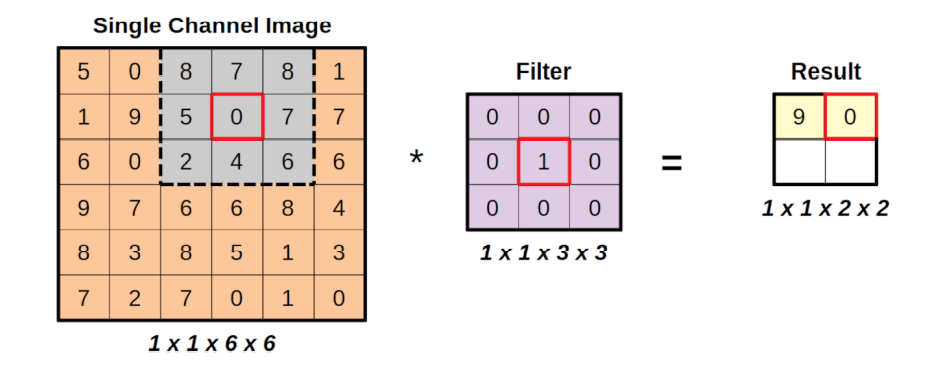

In [ ]:
region4 = mat[:,:,0:3,2:5]*I

In [ ]:
region4

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]]])

Il est clair que nous ne pouvons couvrir que deux regions par dimension.

Plus le stride augmente plus l'image resultante devient petite

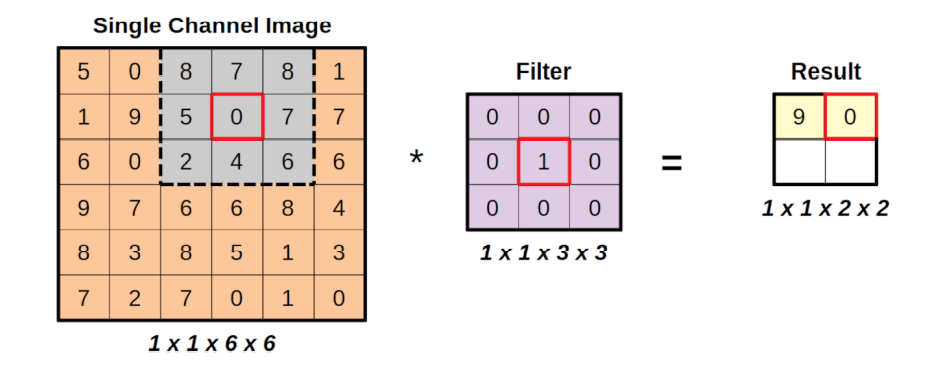

On en arrive à la conclusion que si le stride augmente alors les regions interessantes où l'on applique le filtre diminue.

Notre formule change:

 $$ (h_{i},w_{i}) * (h_{f},w_{f})= ((h_{i} - h_{f}+1)/s,(w_{i} - w_{f}+1)/s$$

 Sous pytorch le stride est simplement un argument

In [ ]:
torch.conv2d(mat_tens,I_tens,stride = 2)

tensor([[[[9., 0.],
          [7., 6.]]]])

Exercice: réecrire la methode convolution en y ajoutant le parametre stride

In [ ]:
def convolution_stride(image,noyau,stride=1):
  
  pass


**Padding**

Nous avions pose la question précédemeent au cas où nous voulons garder les dimensions d'origine de l'image.

Nous allons y repondre en utilisant le padding qui conssite à ajouter des zeros à l'image originale.

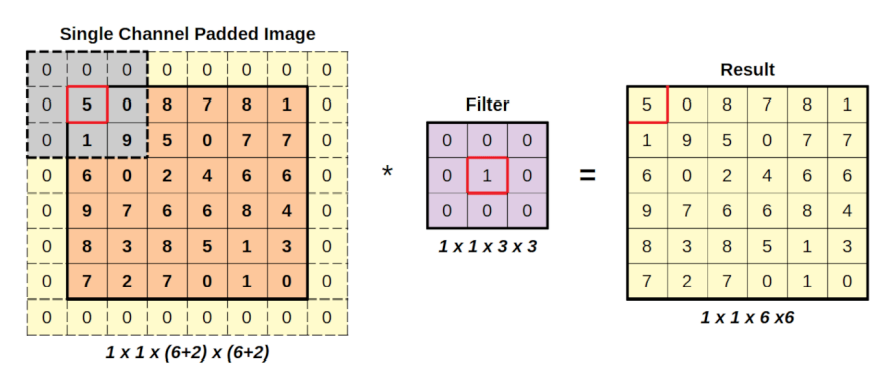

En ajoutant des colonnes et des rangées de zéros autour, nous arrangeons l'
image d'entrée de telle sorte que la région grise commence centrée dans le coin supérieur gauche 
de l'image d'entrée. Cette astuce simple peut être utilisée pour conserver la taille d'origine du
image.

Pytorch fournit une fonction **F.pad** et un module **nn.ConstantPad2d** pour le module.

In [ ]:
const_padding = torch.nn.ConstantPad2d(padding = 1,value = 0)

In [ ]:
const_padding(mat_tens)

tensor([[[[0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 5., 0., 8., 7., 8., 1., 0.],
          [0., 1., 9., 5., 0., 7., 7., 0.],
          [0., 6., 0., 2., 4., 6., 6., 0.],
          [0., 9., 7., 6., 6., 8., 4., 0.],
          [0., 8., 3., 8., 5., 1., 3., 0.],
          [0., 7., 2., 7., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.]]]])

**nn.ConstantPad2d** a deux arguments:

* le pas avec l'argument padding

* la valeur à mettre dans le padding

On peut faire aussi un padding assymetrique avec le parametre padding qui prend comme valeur un tuple (left, right,top, bottom).

Par exemple padding = (1,1,0,0) signifie que le padding sera fait à gauche et à droite

In [ ]:
const_padding2 = torch.nn.ConstantPad2d(padding = (1,1,1,1),value = 0)

On peut faire la meme chose avec **F.pad**

In [ ]:
image_pad = F.pad(mat_tens,mode='constant',pad = (1,1,1,1),value=0)

In [ ]:
image_pad

tensor([[[[0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 5., 0., 8., 7., 8., 1., 0.],
          [0., 1., 9., 5., 0., 7., 7., 0.],
          [0., 6., 0., 2., 4., 6., 6., 0.],
          [0., 9., 7., 6., 6., 8., 4., 0.],
          [0., 8., 3., 8., 5., 1., 3., 0.],
          [0., 7., 2., 7., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.]]]])

On peut avoir diffrents modes avec F.pad: circular, reflect, et replicate.

Essayer de les tester et dites ce que vous remarquez.

**Nouvelles dimensions avec le padding**

En remplissant une image, il est possible d'obtenir des images résultantes avec les mêmes dimensions que 
les images d'entrée, ou même plus grandes, si vous choisissez de remplir de plus en plus de
lignes et colonnes dans l'image d'entrée. En supposant que nous faisons un padding symétrique
de taille p, la forme résultante est donnée par la formule ci-dessous:

$$ (h_{i},w_{i}) * (h_{f},w_{f})= ((h_{i} +2*p - h_{f})/s +1,(w_{i} +2*p - w_{f})/s + 1$$

Exercice: Réecrire la methode de convolution en y ajoutant du padding

In [ ]:
def convolution_str_padding(image,noyau,stride = 1,padding = 1):
  pass

**POOLING**

Elle consiste à decouper l'image en plusieurs parties, effectuer une operation qui retourne une seule valeur sur chaque partie et regrouper les resultats en une nouvelle image.

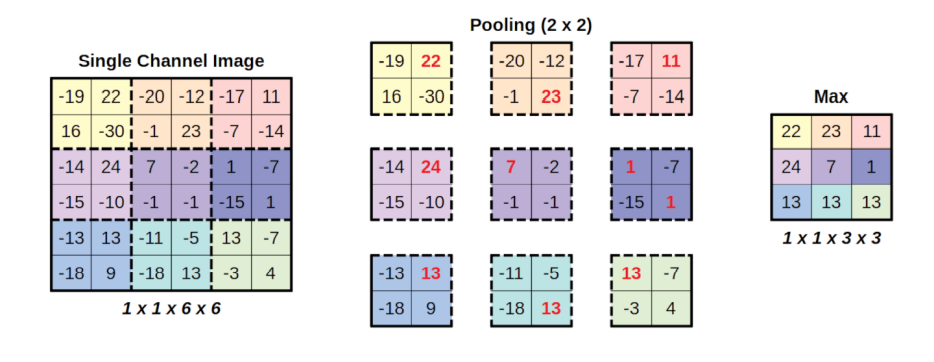

Dans l'exemple ci-dessus, l'image est decoupee en 9 parties. Sur chaque partie on applique l'operation max et reunit les resultats en une nouvelle image.

C'est comme si on applique l'operation max avec un noyau de taille 2x2 sur toute l'image.

Un pooling de taille 2x2 diminue l'image de moitié.

Comme d'habitude dans Pytorch, nous avons les fonctions:

* F.max_pool2d et nn.MaxPool2d

* F.avg_pool2d et nn.AvgPool2d


In [ ]:
pooled = F.max_pool2d(image_pad, kernel_size=2)
pooled

tensor([[[[5., 8., 8., 1.],
          [6., 9., 7., 7.],
          [9., 8., 8., 4.],
          [7., 7., 1., 0.]]]])

In [ ]:
maxpool4 = nn.MaxPool2d(kernel_size=4)

pool4 = maxpool4(image_pad)
pool4

tensor([[[[9., 8.],
          [9., 8.]]]])

**FLATTENING**

Il aplatit simplement un tenseur, préservant la premiere
dimension de tel sorte que le nombre de points de données est conserve  en regroupant les données de toutes les autres
dimensions. Il a un module **nn.Flatten**

In [ ]:
flattened = nn.Flatten()(pool4)
flattened

NameError: ignored

Il n'a pas besoin d'une version sous forme de fonction car on peut utiliser view

In [ ]:
pooled.view(-1,1)


tensor([[5.],
        [8.],
        [8.],
        [1.],
        [6.],
        [9.],
        [7.],
        [7.],
        [9.],
        [8.],
        [8.],
        [4.],
        [7.],
        [7.],
        [1.],
        [0.]])

**DIMENSIONS**

Toutes les fonctions vues ont des versions en 1d ou 3d

**EXEMPLE D4ARCHITECTURE**

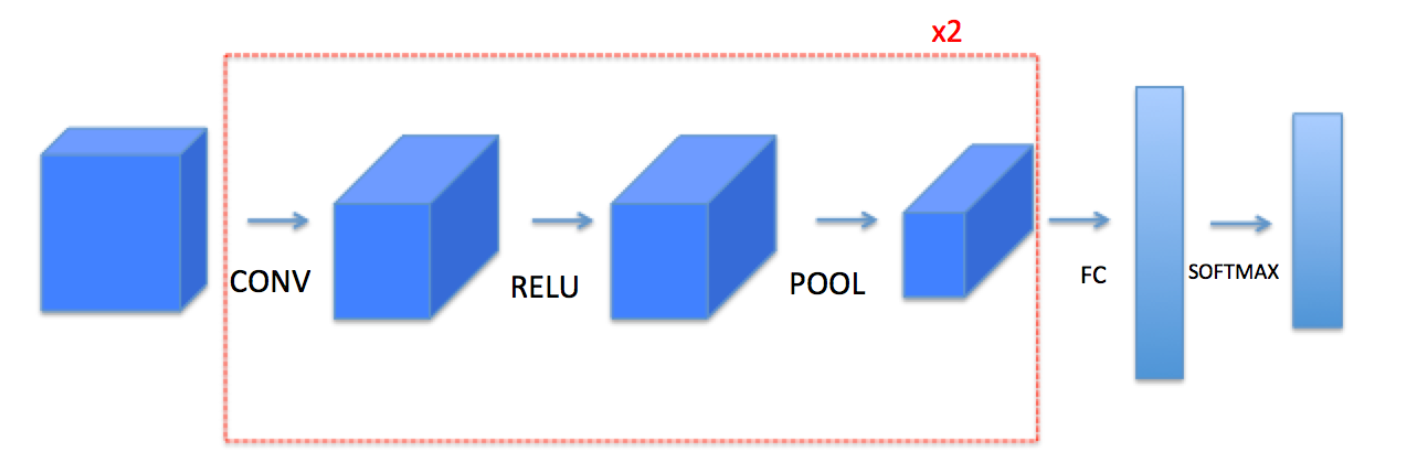

**AUTRE EXEMPLE D'ARCHITECTURE: LENET 5**

LeNet-5 est un réseau de neurones convolutifs à 7 couches développé par Yann LeCun en 1998 pour reconnaître les chiffres écrits à la main dans les images 28x28 pixels de la célèbre base de donnees MNIST! 

C'est là que tout a commencé (un peu). En 1989, LeCun lui-même a utilisé la rétropropagation  pour apprendre la convolution avec les
filtres, comme nous l'avons vu ci-dessus, au lieu de les appliquer manuellement.

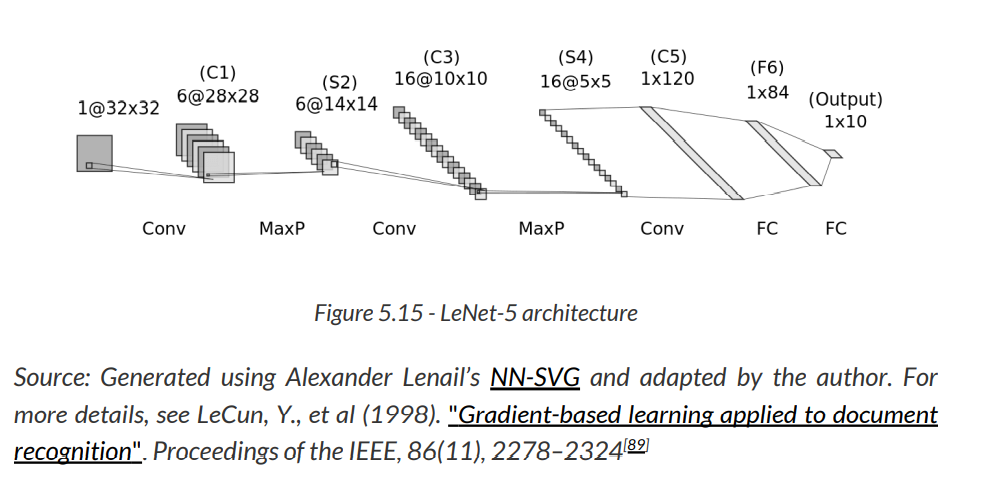

**Exercice**

Implementer LenET5

In [ ]:
@jit
def jit_square(x):
  return x*x

In [ ]:
%%time
jit_square(4)

CPU times: user 96.7 ms, sys: 299 ms, total: 396 ms
Wall time: 970 ms


DeviceArray(16, dtype=int32, weak_type=True)

In [ ]:
from jax import make_jaxpr

In [ ]:
jaxsquare = make_jaxpr(jit_square)

In [ ]:
print(jaxsquare(4))

{ lambda ; a:i32[]. let
    b:i32[] = xla_call[
      call_jaxpr={ lambda ; c:i32[]. let d:i32[] = mul c c in (d,) }
      name=jit_square
    ] a
  in (b,) }


In [ ]:
import timeit
import jax.numpy as jnp
import numpy as np
#Normal Function
def FuncA(x,y):
  return np.asarray(np.dot(x,y))

#And JIT version
@jit
def FuncB(x,y):
  return jnp.dot(x,y)

x = jnp.ones((1000,1000))






In [ ]:
%%time
FuncA(x,x)

CPU times: user 38.8 ms, sys: 7.96 ms, total: 46.8 ms
Wall time: 30.2 ms


array([[1000., 1000., 1000., ..., 1000., 1000., 1000.],
       [1000., 1000., 1000., ..., 1000., 1000., 1000.],
       [1000., 1000., 1000., ..., 1000., 1000., 1000.],
       ...,
       [1000., 1000., 1000., ..., 1000., 1000., 1000.],
       [1000., 1000., 1000., ..., 1000., 1000., 1000.],
       [1000., 1000., 1000., ..., 1000., 1000., 1000.]], dtype=float32)

In [ ]:
%%time
FuncB(x,x)

CPU times: user 14.7 ms, sys: 0 ns, total: 14.7 ms
Wall time: 13.9 ms


DeviceArray([[1000., 1000., 1000., ..., 1000., 1000., 1000.],
             [1000., 1000., 1000., ..., 1000., 1000., 1000.],
             [1000., 1000., 1000., ..., 1000., 1000., 1000.],
             ...,
             [1000., 1000., 1000., ..., 1000., 1000., 1000.],
             [1000., 1000., 1000., ..., 1000., 1000., 1000.],
             [1000., 1000., 1000., ..., 1000., 1000., 1000.]],            dtype=float32)

In [ ]:
2/-5

-0.4